In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
######################
# Carga de los datos #
######################

df = pd.read_csv("../data/income_data.csv")

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##############
# Duplicados #
##############

duplicados = df.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")


Duplicados encontrados: 52


In [ ]:
#####################
# Tipo de variabels #
#####################

cat_vars = df.select_dtypes(include='object').columns.tolist()
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", cat_vars)
print("Variables numéricas:", num_vars)


Variables categóricas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Variables numéricas: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
#########
# nulos #
#########

nulos = df.isnull().sum()
nulos


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Análisis Univariante

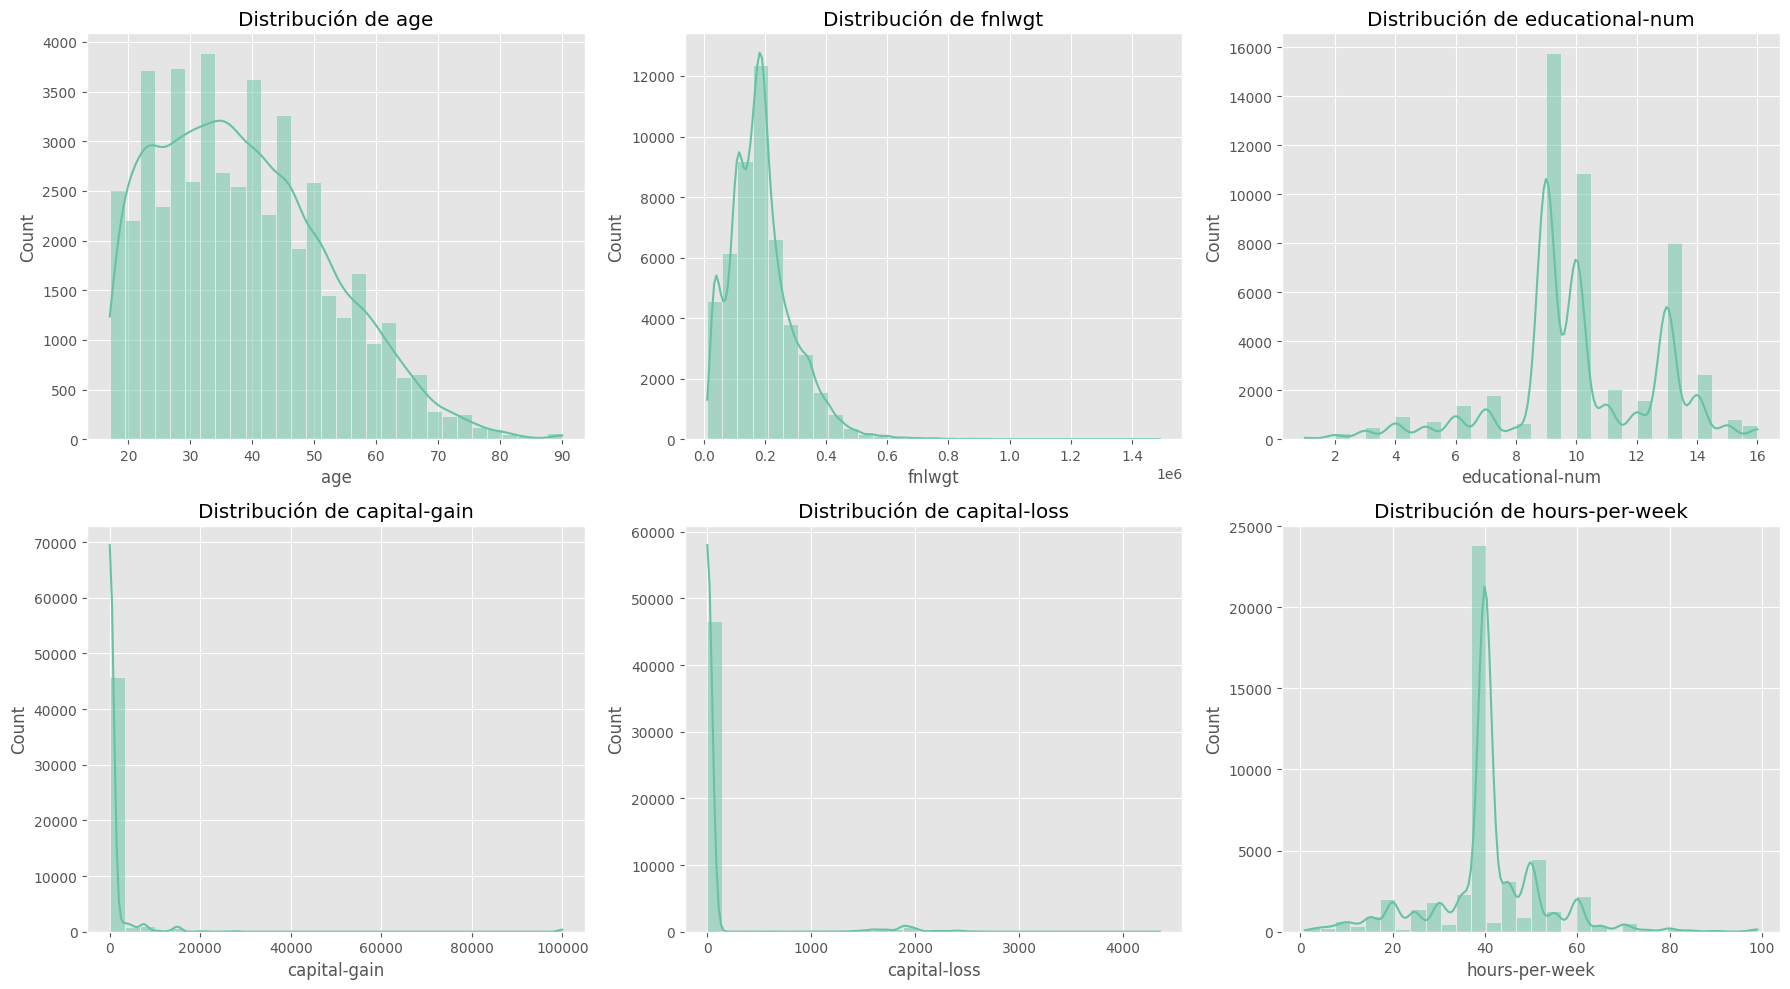

In [62]:
##########################
# Distribución numéricas #
##########################

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


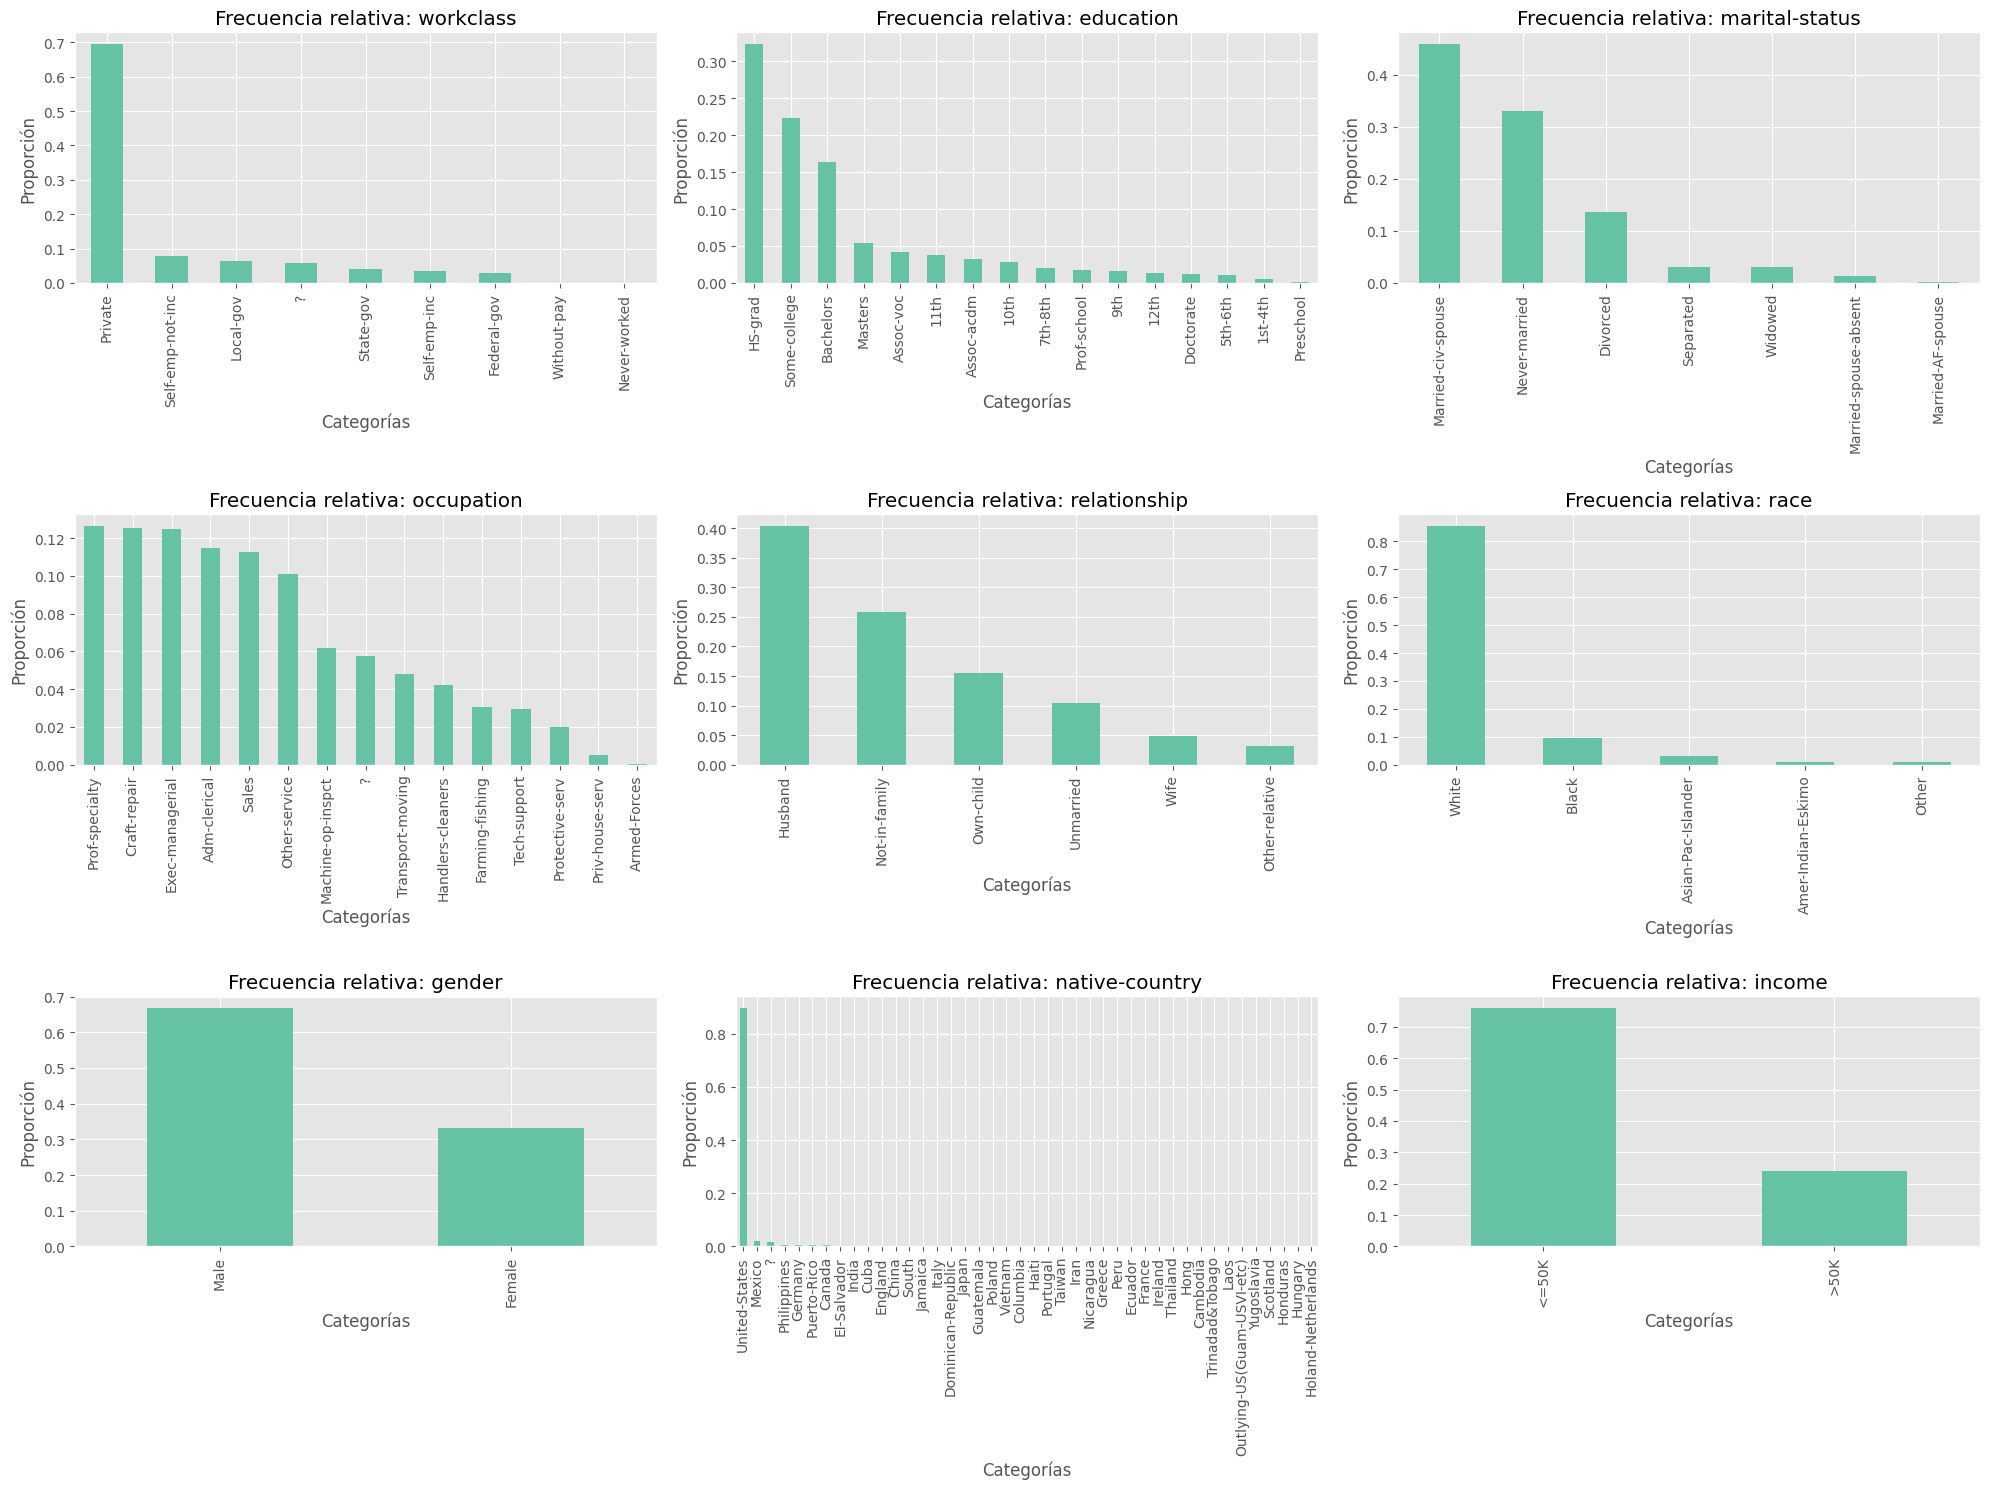

In [63]:
############################
# Distribución categóricas #
############################

cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frecuencia relativa: {col}')
    axes[i].set_ylabel('Proporción')
    axes[i].set_xlabel('Categorías')

plt.tight_layout()
plt.show()


income
<=50K    37155
>50K     11687
Name: count, dtype: int64
income
<=50K    0.761
>50K     0.239
Name: proportion, dtype: float64


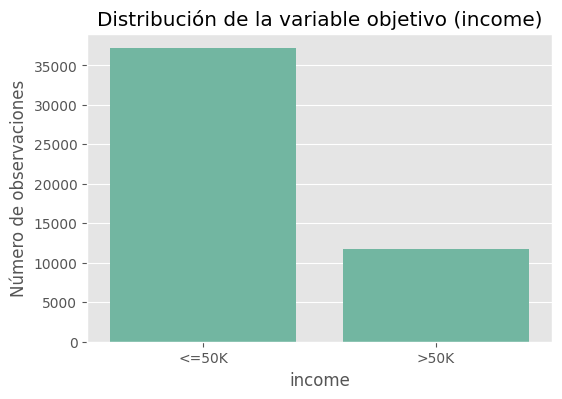

In [64]:
############################
# Distribución V. objetivo #
############################


print(df['income'].value_counts())
print(df['income'].value_counts(normalize=True).round(3))


plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title('Distribución de la variable objetivo (income)')
plt.ylabel('Número de observaciones')
plt.show()


He revisado todas las variables de forma individual. En las numéricas, destaca que age y hours-per-week tienen una distribución razonable, pero capital-gain y capital-loss están muy sesgadas hacia cero. En fnlwgt también hay mucha dispersión, aunque no parece tener una distribución clara.

En cuanto a las categóricas, algunas como occupation o native-country tienen muchas categorías, pero la mayoría están dominadas por unas pocas clases frecuentes. He revisado la cardinalidad de todas para tenerlo en cuenta en el encoding. La variable objetivo income está desbalanceada: alrededor del 90 % gana <=50K y solo un 10 % gana >50K.

También he visto que hay 52 registros duplicados, pero no los he eliminado todavía.


## Análisis Bivariante

Mi objetivo con este análisis bivariante es ver si los ingrsos altos se relacionan con valores extremos de las variables numéricas.

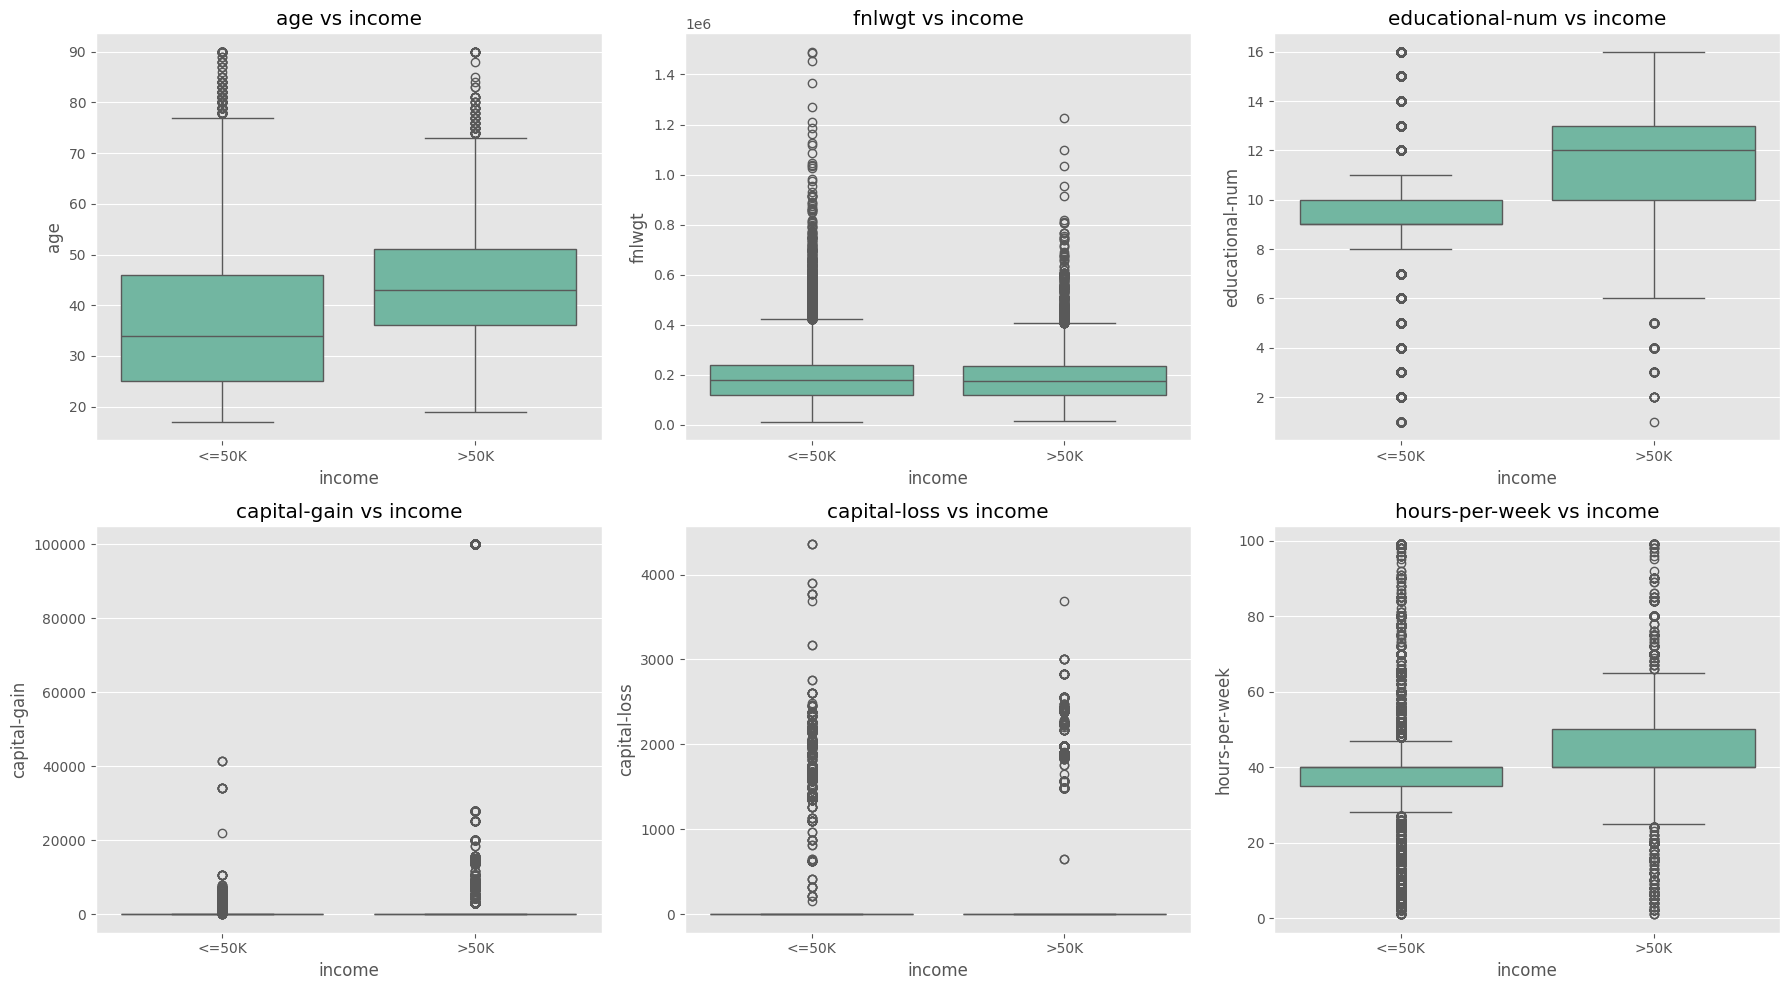

In [65]:
##########################
# V.numéricas VS income  #
##########################

num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(x='income', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs income')

plt.tight_layout()
plt.show()


In [66]:
######################
# Analisis de medias #
######################

#Para saber que variables tienen diferencias significativas entre sus clases
df.groupby('income')[num_cols].agg(['mean', 'std']).T


income                        <=50K           >50K
age             mean      36.872184      44.275178
                std       14.104118      10.558983
fnlwgt          mean  190039.565523  188470.574570
                std   106577.604741  102442.731958
educational-num mean       9.598493      11.602807
                std        2.437673       2.382624
capital-gain    mean     147.010308    4042.239497
                std      936.753678   14756.771034
capital-loss    mean      54.151931     193.528964
                std      313.320005     593.211612
hours-per-week  mean      38.840048      45.452896
                std       12.356849      11.091176

In [67]:
def cross_proportions(col):
    ct = pd.crosstab(df[col], df['income'], normalize='index').sort_values(by='>50K', ascending=False)
    return ct.style.background_gradient(cmap='Blues').format("{:.2%}")

cross_proportions('education')
cross_proportions('marital-status')

income,<=50K,>50K
marital-status,,
Married-civ-spouse,55.39%,44.61%
Married-AF-spouse,62.16%,37.84%
Divorced,89.88%,10.12%
Married-spouse-absent,90.76%,9.24%
Widowed,91.57%,8.43%
Separated,93.53%,6.47%
Never-married,95.45%,4.55%


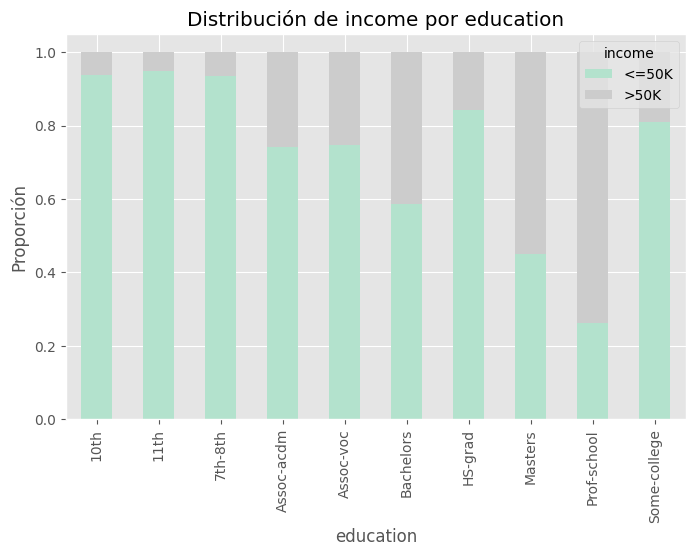

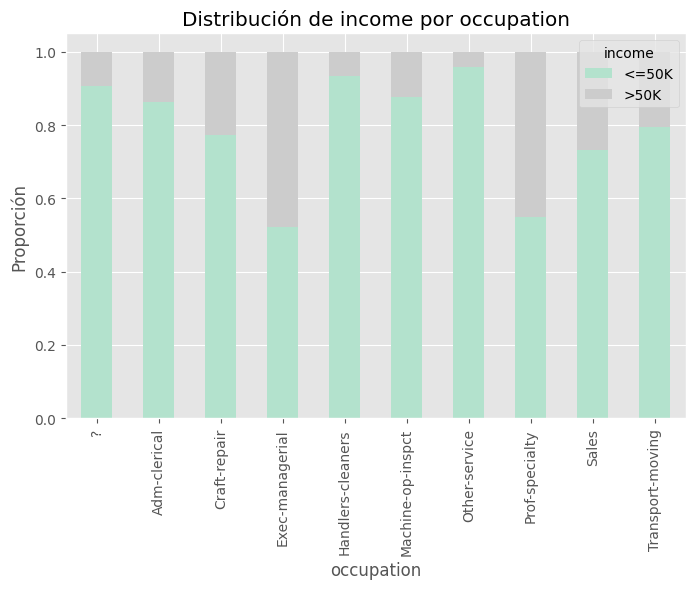

In [68]:
################################
# proporcion de income por cat #
################################

def plot_income_distribution(col, top_n=10):
    prop_df = (df[col].value_counts(normalize=True).head(top_n).index)
    subset = df[df[col].isin(prop_df)]
    ctab = pd.crosstab(subset[col], subset['income'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel2')
    plt.title(f'Distribución de income por {col}')
    plt.ylabel('Proporción')
    plt.grid(True)
    plt.show()

plot_income_distribution('education')
plot_income_distribution('occupation')


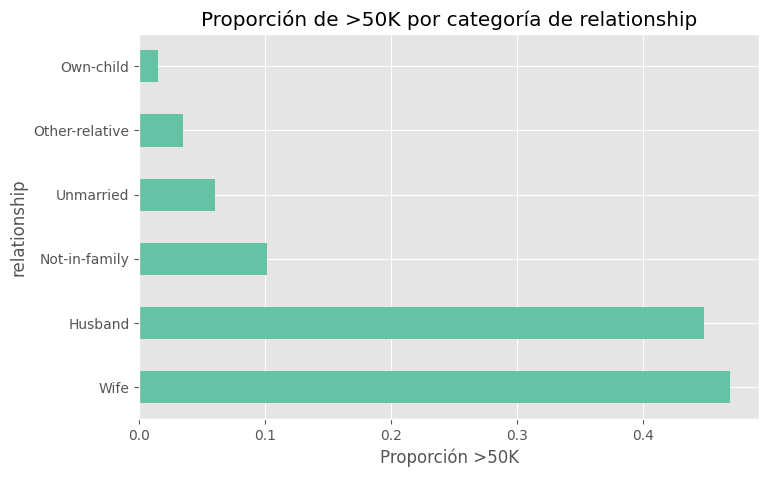

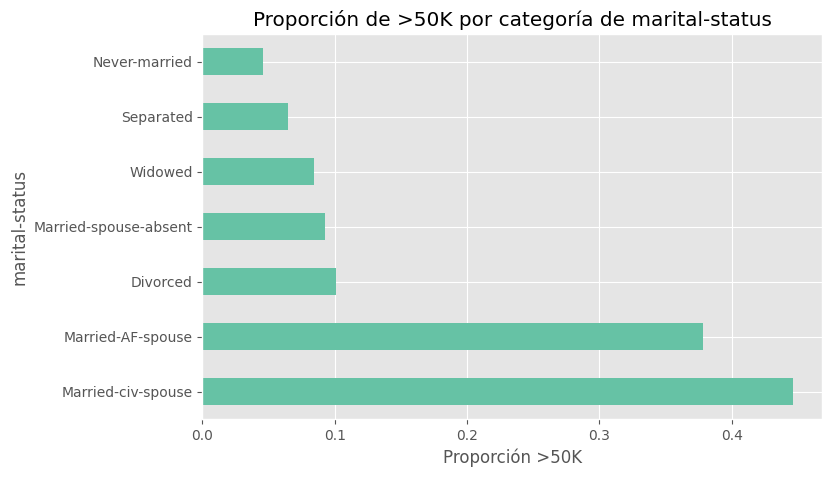

In [69]:
##############################
# Barplot de proporción >50K #
##############################

def plot_income_ratio(col, top_n=10):
    df_ = df.copy()
    df_['income_binary'] = df_['income'].map({'>50K': 1, '<=50K': 0})
    ratio = df_.groupby(col)['income_binary'].mean().sort_values(ascending=False).head(top_n)
    ratio.plot(kind='barh', figsize=(8,5))
    plt.title(f'Proporción de >50K por categoría de {col}')
    plt.xlabel('Proporción >50K')
    plt.grid(True)
    plt.show()

plot_income_ratio('relationship')
plot_income_ratio('marital-status')


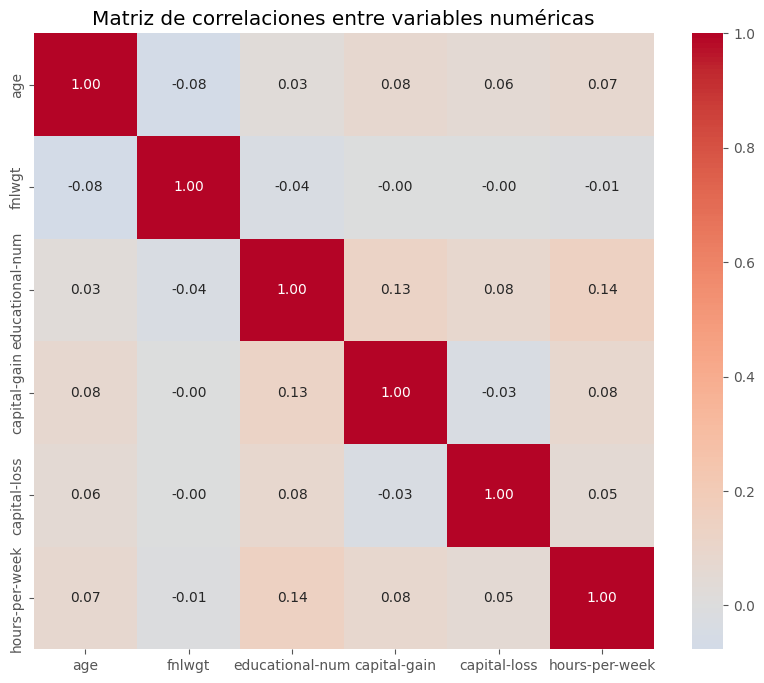

In [70]:
############################
# Correlación V. Numericas #
############################

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()


In [71]:
#################################
# comprobaciones occupation = ? #
#################################

print("Registros con occupation = '?':", (df['occupation'] == '?').sum())
pd.crosstab(df['occupation'], df['income'], normalize='index').loc['?']


Registros con occupation = '?': 2809


income
<=50K    0.90566
>50K     0.09434
Name: ?, dtype: float64

He encontrado 2809 registros con la categoría "?" en occupation. Representan un 5.7 % del total y su distribución de income es muy parecida a la general, así que he decidido dejarla como está y tratarla como una categoría más.


He comparado todas las variables con la variable income para ver si tienen relación. En las numéricas, se ve claramente que las personas con ingresos >50K son mayores, tienen más estudios (educational-num), ganan más dinero y trabajan más horas por semana. En capital-gain y capital-loss hay muchos ceros, pero los valores positivos están más presentes en los que ganan más.

En las categóricas también hay patrones claros. Por ejemplo, las personas casadas tienen más probabilidad de ganar >50K, y lo mismo pasa con ciertas ocupaciones como exec-managerial o prof-specialty. En cambio, never-married o occupations como handlers-cleaners están más ligadas a <=50K. También se ve una relación interesante entre marital-status y gender, aunque por ahora no he creado variables cruzadas.

La variable fnlwgt no muestra relación clara con income, así que podría descartarse después si sigue sin aportar.


## Análisis Multivariante

In [72]:
#############################
# Detección de outliers IQR #
#############################

def detectar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Aplicamos a variables más sensibles
for col in ['capital-gain', 'capital-loss', 'hours-per-week']:
    outliers, li, ls = detectar_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers | Límites: ({li:.2f}, {ls:.2f})")



capital-gain: 4035 outliers | Límites: (0.00, 0.00)
capital-loss: 2282 outliers | Límites: (0.00, 0.00)
hours-per-week: 13496 outliers | Límites: (32.50, 52.50)


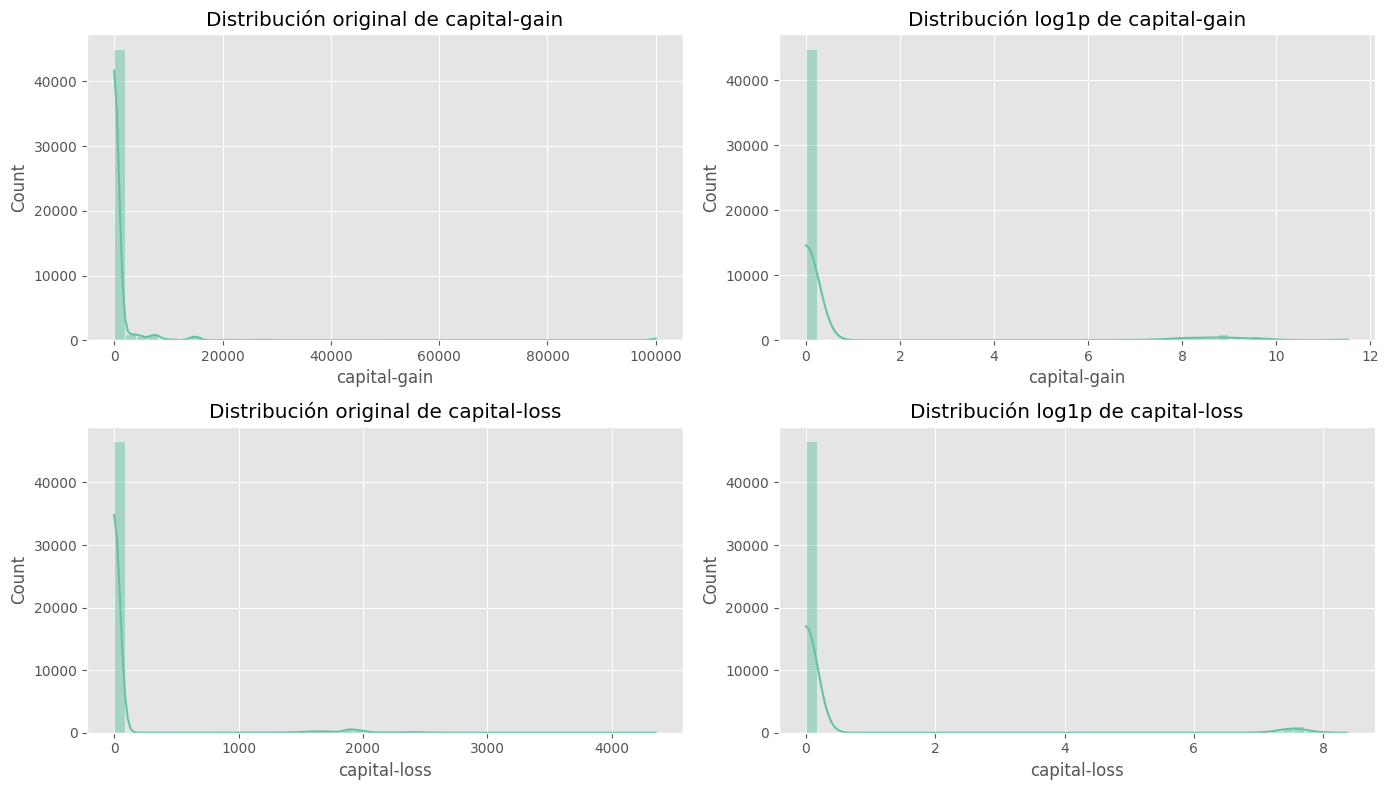

In [73]:
###########################
# Visualizacion de sesgos #
###########################

# Visualización original y log-transformada
cols_sesgadas = ['capital-gain', 'capital-loss']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, col in enumerate(cols_sesgadas):
    sns.histplot(df[col], bins=50, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribución original de {col}')

    sns.histplot(np.log1p(df[col]), bins=50, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Distribución log1p de {col}')

plt.tight_layout()
plt.show()


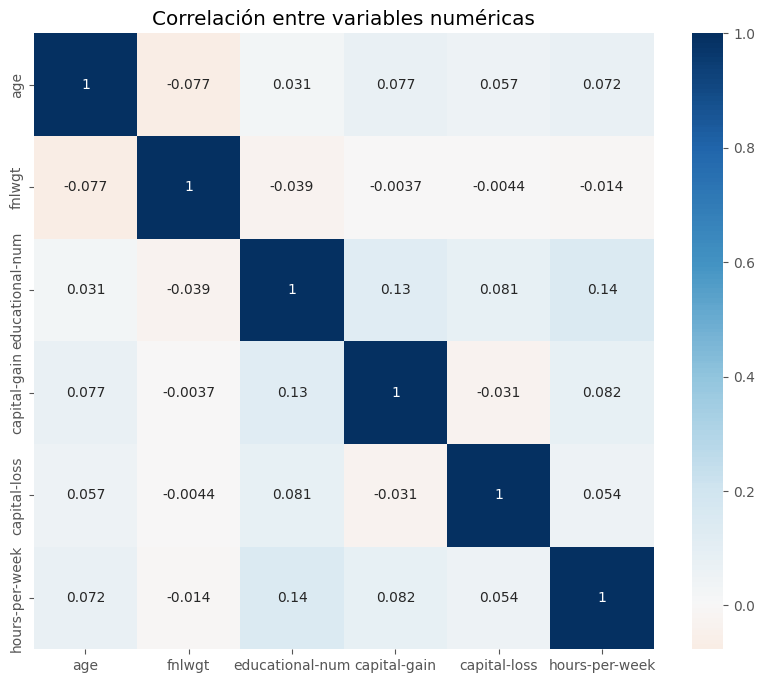

In [74]:
###########################
# Matriz de correlaciones #
###########################

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdBu', center=0)
plt.title("Correlación entre variables numéricas")
plt.show()


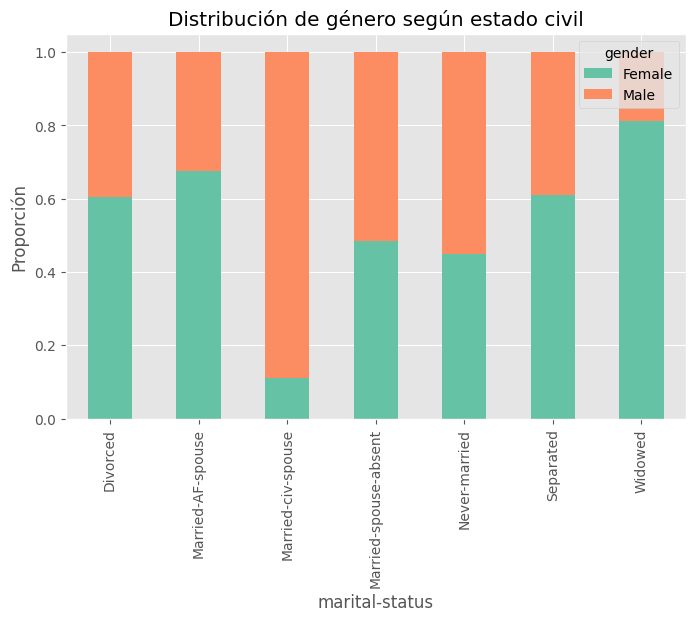

In [75]:
###################################
# posibles interacciones cruzadas #
###################################

# Ejemplo: combinación marital-status y gender
pd.crosstab(df['marital-status'], df['gender'], normalize='index').plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Distribución de género según estado civil')
plt.ylabel('Proporción')
plt.grid(True)
plt.show()


He aplicado IQR para detectar outliers en capital-gain, capital-loss y hours-per-week. En las dos primeras no sirve porque casi todos los valores son 0, así que IQR da 0 como rango. En hours-per-week sí detecta muchos valores fuera de lo normal, pero no los elimino porque tienen sentido real (gente que trabaja muchas o pocas horas).

También he probado log1p en capital-gain y capital-loss para ver si mejora su distribución. La transformación mejora mucho el sesgo, así que la dejo como opción si uso modelos que lo necesiten.

He revisado las correlaciones entre numéricas y no hay colinealidades fuertes. education y educational-num están relacionadas, así que me quedaré solo con una en el preprocesado. Por último, he revisado algunas combinaciones de categóricas y no veo por ahora necesidad de crear interacciones.
